# Qiskit: Erste Schritte

Dieser vorbereitenden Texte bezieht sich auf das neue [Qiskit Textbook (beta)](https://qiskit.org/textbook-beta/) (Stand Mai 2022). In dem Jupyter-Notebook von IBM, dem IBM Quantum Lab (siehe https://quantum-computing.ibm.com/) findet man die Texte im Verzeichnis "`Lab files/qiskit-textbook/content/ch-states`" für den Einstieg.

Tutorial zur Auffrischung der Linearen Algebra:
https://qiskit.org/textbook/ch-appendix/linear_algebra.html

## Installation von Qiskit

Wenn Sie Qiskit nicht in einem Notebook in der IBM-Cloud nutzen, dann müssen Sie das Qiskit-Paket installieren. Das gilt z.B. auch für die [Colab-Notebooks](https://colab.research.google.com/) in der Google-Cloud. Die Installation erfolgt mit `pip`, dem *Package Installer for Python*. Mit dem vorangestellten Ausrufezeichen wird ein Shell-Kommando aus dem Notebook heraus abgesetzt. Damit die Installation nicht unbeabsichtig ausgeführt wird, verwandelt das Kommentarzeichen `#` am Anfang der Zeile das Kommando in einen Kommentar. Entfernen Sie das `#`-Zeichen, wenn Sie die Installation vornehmen möchten. 

Wenn man ein Colab-Notebook für längere Zeit nicht nutzt, dann wird der virtuelle Rechner zurückgesetzt. Dann müssen Sie die Installation wiederholen.

In [7]:
# !pip install qiskit # Nur aufrufen, wenn Qiskit nicht installiert ist.

Die Qiskit-Dokumentation ist zu finden unter https://qiskit.org/documentation/.


## Schaltkreis aufsetzen und simulieren

Dieser Text dient zur Vorbereitung auf das Tutorial "[The Atoms of Computation](https://learn.qiskit.org/course/ch-states/the-atoms-of-computation)":

* Aufsetzen eines Schaltkreises, eines klassischen Halbaddierers aus dem [Tutorial](https://learn.qiskit.org/course/ch-states/the-atoms-of-computation#diagram)
* Einbindung der notwenigen Elemente aus Qiskit
* Erklärung, wie man das Schaltbild liest
* Und -- ganz wichtig -- das Aufsetzen eines Schaltbilds ist zu trennen von seiner Berechnung durch Simulation
* Verstehen, dass man Quantenschaltungen öfters laufen lässt, weil Messungen mit Wahrscheinlichkeiten zu tun haben.

### Wie eine Schaltung zu lesen ist

Das Bild zeigt einen Quanten-Schaltkreis mit 4 Qubits und 2 klassischen Bits. Die Qubits werden in der Darstellung durch horizontale Linien dargestellt und beginnend mit dem Index 0 adressiert. Die (klassischen) Bits, die man benötigt, um die Qubits auszulesen, erhalten keine separaten horizontalen Linien -- sie werden durch die unterste, mit `c` bezeichnete Doppellinie erfasst. Die Zahl hinter dem `c` gibt an, wieviele klassische Bits von dieser Linie repräsentiert werden.

![Ein Bild](https://learn.qiskit.org/content/ch-states/images/quantum_circuit.png)

Die Linien stellen von links nach rechts einen zeitlichen Ablauf dar. Die gestrichelten, senkrechten Linien dienen lediglich zur Strukturierung der Schaltung in Abschnitte.

Das Kästchen mit dem "x" stellt ein NOT-Schaltglied dar, wofür Qiskit auch das `x` verwendet. Das Schaltelement mit dem Knubbel und dem Plus-Symbol ist ein _controlled not gate_ (CNOT, in Qiskit `cx`). Das Plus-Symbol mit den zwei Knubbeln ist ein _Toffoli gate_ (`ccx` in Qiskit).

Die Messanzeigen stellen dar, dass ein Qubit ausgelesen und in einem der Bits abgelegt wird. Die kleinen Zahlen geben den Index des entsprechenden Bits an -- es handelt sich hier also nicht um Ergebniswerte, sondern um den Index des klassischen Bits.

### Aufsetzen einer Schaltung

Zunächst müssen die relevanten Werkzeuge importiert werden:
* Mit der Klasse [`QuantumCircuit`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html) wird ein Quanten-Schaltkreis erzeugt, der dann konfiguriert werden kann. 
* Mit der [`execute`](https://qiskit.org/documentation/apidoc/execute.html)-Funktion wird eine Simulation eines Quanten-Schaltkreises ausgeführt.
* Das [`Aer`-API](https://qiskit.org/documentation/apidoc/aer.html) bietet eine Reihe von hochperformanten Simulatoren [[Wikipedia:Aer](https://en.wikipedia.org/wiki/Qiskit#Qiskit_Aer)].

In [8]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit import QuantumRegister, ClassicalRegister # Zu Demozwecken importiert

In diesem Beispiel setzt man einen Quanten-Schaltkreis auf mit 4 Qubits und 2 klassischen Bits. Die Schaltung realisiert einen Halbaddierer.

In [9]:
qc_ha = QuantumCircuit(4,2) # 4 ist Anzahl der Qubits
# qc_ha = QuantumCircuit(QuantumRegister(4),ClassicalRegister(2),name="Halbaddierer") # alternative Konfiguration
qc_ha.draw() # Ohne graphische Bibliothek erfolgt eine Textausgabe

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
c: 2/

Die weitere Konfiguration der Schaltung sollte mit der obigen Beschreibung zum Bild nachvollziehbar sein. Man baut die Schaltung mit den Aufrufen gewissenmaßen von links nach rechts auf. Was sich in der graphischen bzw. text-graphischen Ausgabe nicht überlappt, kann übereinander dargestellt werden.

In [10]:
qc_ha.x(0) # x(0) wendet das NOT-Gate auf q_0 an.
qc_ha.x(1) # x(1) wendet das NOT-Gate auf q_1 an.
qc_ha.barrier()
qc_ha.cx(0,2) # CNOT-Gate
qc_ha.cx(1,2) # Auch hier: Indizes beziehen sich auf Qubit-"Leitungen"
qc_ha.ccx(0,1,3) # Toffoli-Gate
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # Messe q_2
qc_ha.measure(3,1) # Messe q_3

qc_ha.draw() # Darstellung der Schaltungskonfiguration

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

### Schaltungssimulation

Mit der Konfiguration ist in Python eine interne Objektrepräsentation der Schaltung entstanden. Die Simulation der Schaltung ist nun ein eigenständiger Schritt.

Qiskit bringt mit [Visualizations](https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html) einige Möglichkeiten zur graphischen Aufbereitung mit. Hier genügt `plot_histogram`.

In [11]:
from qiskit.visualization import plot_histogram

Die Simulation, aufgerufen mit `execute`, führt ein "Experiment" mit der übergebenen Schaltung und dem gewählten Simulations-Backend aus. Der Aufruf arbeitet synchron und liefert ein Job-Objekt (siehe [BaseJob](https://qiskit.org/documentation/stubs/qiskit.providers.BaseJob.html)) zurück. Die Qubits werden standardmäßig wie ein klassisches Bit mit dem Wert 0 initialisiert.

In [12]:
simu = execute(qc_ha,Aer.get_backend('qasm_simulator'))
simu

Der Job kann nach dem Ergebnis befragt werden. Wenn man durch das die Selbstanzeige des Objekts scrollt, sieht man z.B. das 1024 Shots, d.h. Durchläufe mit der Schaltung simuliert wurden. Quantensysteme haben ein Zufallselement in sich. Über die vielen Durchläufe weiß man dann, wie oft sich welche Resultate ergeben haben. Das liefert einem Eindrücke über die Wahrscheinlichkeitsverteilung.

In [13]:
result = simu.result()
result

Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='8a8e1890-2891-4e19-a165-be96227b08dc', job_id='20e35469-6cc9-4c05-8372-468d57f0d3e1', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 1024}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=4, name='circuit-1', qreg_sizes=[['q', 4]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3]]), status=DONE, seed_simulator=1785944428, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'device': 'CPU', 'active_input_qubits': [0, 1, 2, 3], 'measure_sampling': True, 'num_clbits': 2, 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'num_qubits': 4, 'method': 'statevector', 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken

In diesem Fall verhält sich die Quantenschaltung absolut eindeutig. Das Ergebnis der beiden klassischen Bits ist immer gleich.

In [14]:
counts = result.get_counts()
counts

{'10': 1024}

Das Ergebnis kann man sich sehr schön mit Hilfe des Histogram-Plots veranschaulichen. In diesem Fall ist es wenig spektakulär. 😉

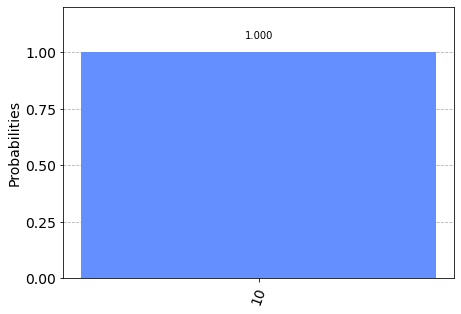

In [15]:
plot_histogram(counts)

Mit dieser Einleitung kann es losgehen mit dem Tutorial "[The Atoms of Computation](https://learn.qiskit.org/course/ch-states/the-atoms-of-computation)".

## Ein Qubit-Experiment mit dem Halbaddierer

In [16]:
qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

Wir haben oben einen Halbaddierer als Quanten-Schaltkreis eingeführt. Wir schauen uns in diesem Experiment an, was die Schaltung liefert, wenn wir die Eingangsbits $q_0$ und $q_1$ nicht mit der Grundeinstellung von $|0\rangle$ initialisieren.

Als Initalwert sei der Zustandsvektor $\begin{bmatrix}1/\sqrt{2} \\ 1/\sqrt{2}\end{bmatrix}$ gewählt. Dieser Vektor erfüllt die Bedingung, dass die Summe der Quadratwerte gleich Eins ist. Da die Fließkomma-Arithmetik in Python nicht exakt rechnet, hilft `isclose` beim Vergleich. Die Methode wird intern bei der Initialisierung genutzt, damit keine ungültigen Zustandsvektoren zum Einsatz kommen.

In [17]:
import math

In [26]:
q_init = [1/math.sqrt(2), 1/math.sqrt(2)]
assert math.isclose(q_init[0]*q_init[0]+q_init[1]*q_init[1], 1)
q_init

[0.7071067811865475, 0.7071067811865475]

Interessanterweise kann man eine Schaltung nicht nachträglich initialisieren. Die `initialize`-Methode macht es wie die anderen Konfigurationsmethoden (wie z.B. `x`, `cx` und `ccx`) auch und setzt die Konfiguration nach rechts fort.

Der "Trick" ist, eine Teilschaltung mit der Initialisierung aufzusetzen und eine neue Schaltung aus der Kombination entstehen zu lassen.

In [19]:
qc_init = QuantumCircuit(4,2)
qc_init.initialize(q_init, 0)
qc_init.initialize(q_init, 1)
qc_init.draw()

┌─────────────────────────────┐
q_0: ┤ Initialize(0.70711,0.70711) ├
     ├─────────────────────────────┤
q_1: ┤ Initialize(0.70711,0.70711) ├
     └─────────────────────────────┘
q_2: ───────────────────────────────
                                    
q_3: ───────────────────────────────
                                    
c: 2/═══════════════════════════════

In [20]:
qc_ha2 = qc_init.compose(qc_ha)
qc_ha2.draw()

┌─────────────────────────────┐┌───┐ ░                 ░       
q_0: ┤ Initialize(0.70711,0.70711) ├┤ X ├─░───■─────────■───░───────
     ├─────────────────────────────┤├───┤ ░   │         │   ░       
q_1: ┤ Initialize(0.70711,0.70711) ├┤ X ├─░───┼────■────■───░───────
     └─────────────────────────────┘└───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ─────────────────────────────────────░─┤ X ├┤ X ├──┼───░─┤M├───
                                          ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ─────────────────────────────────────░───────────┤ X ├─░──╫─┤M├
                                          ░           └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════════════════════════════════╩══╩═
                                                               0  1

Führt man die Simulation der Schaltung in der bekannten Weise durch, ergibt sich ein überraschendes Ergebnis: In 50% der Fälle ist das Ergebnis eine `01` und in jeweils 25% der Fälle eine `00` bzw. eine `10`.

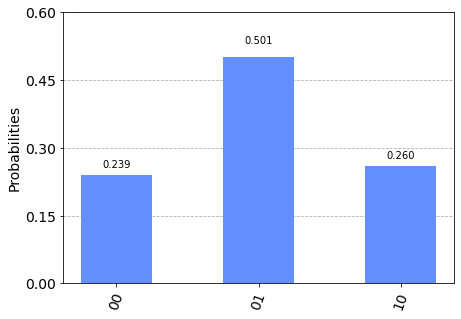

In [21]:
counts = execute(qc_ha2,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Wie erklärt sich das Ergebnis? Man könnte sich folgenden Reim darauf machen: Der Zustandsvektor für die beiden Eingangsqubits ist so gesetzt, dass die klassischen Bitwerte gleichermaßen wahrscheinlich erscheinen. Für die Kombination der beiden Eingangswerte ergibt sind in der Tabelle pro Reihe eine Wahrscheinlichkeit von 25%.

| $q_0$ | $q_1$ | Addition |
|:-----:|:-----:|:--------:|
|   0   |   0   |    00    |
|   0   |   1   |    01    |
|   1   |   0   |    01    |
|   1   |   1   |    10    |

Die Summe von 1 kommt in zwei Reihen vor, das binäre Ergebnis `01` hat eine Auftretenswahrscheinlichkeit von 50%. Das Ergebnis 0 (binär `00`) und das Ergebnis 2 (binär `10`) kommt jeweils mit 25%iger Wahrscheinlichkeit vor.

Wenn ein Quantenrechner nur einen Durchlauf macht, dann wäre ein mehr oder minder zufälliges Ergebnis zu erwarten.

## Ein Blick hinter die Kulissen: Der Zustandsvektor

In [22]:
qc_ha2.draw()

┌─────────────────────────────┐┌───┐ ░                 ░       
q_0: ┤ Initialize(0.70711,0.70711) ├┤ X ├─░───■─────────■───░───────
     ├─────────────────────────────┤├───┤ ░   │         │   ░       
q_1: ┤ Initialize(0.70711,0.70711) ├┤ X ├─░───┼────■────■───░───────
     └─────────────────────────────┘└───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ─────────────────────────────────────░─┤ X ├┤ X ├──┼───░─┤M├───
                                          ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ─────────────────────────────────────░───────────┤ X ├─░──╫─┤M├
                                          ░           └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════════════════════════════════╩══╩═
                                                               0  1

Das bisher verwendete Simulationsbackend `qasm_simulator` verhält sich wie ein echter Quantenrechner. Das Backend mit einem Simulator für den Zustandsvektor erlaubt einen Blick auf den Zustandsvektor _vor_ der Messung -- in der Realität ist das nicht möglich.

Der Zustandsvektor hat $2^4=16$ Werte. Der Simulator rechnet die Schaltung _einmal_ durch, es sind jetzt keine 1024 Shots. Mit jedem Durchlauf können sich teils die Werte ändern. Es lohnt, die Berechnung der nachstehenden Zelle mehrfach anzustoßen, um diesen Effekt zu sehen.

In [37]:
backend = Aer.get_backend('statevector_simulator')
outputstate = backend.run(qc_ha2).result().get_statevector(decimals=3)
# outputstate = backend.run(qc_ha2).result().get_statevector(qc_ha2, decimals=3) # Geht auch: Warum?
print(outputstate)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


Die 16 Werte repräsentieren die Zustandsvektoren für die 16 möglichen Kombinationen der Qubits $q_0$ (ganz oben in der Schaltung), $q_1$, $q_2$ und $q_3$ als Ket $|q_3 q_2 q_1 q_0\rangle$.

(Zur Ordnung der Quibits, siehe den Hinweis im Kasten im Tutorial "[Getting Started With Qiskit](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html)").

In [24]:
from qiskit.visualization import plot_state_city

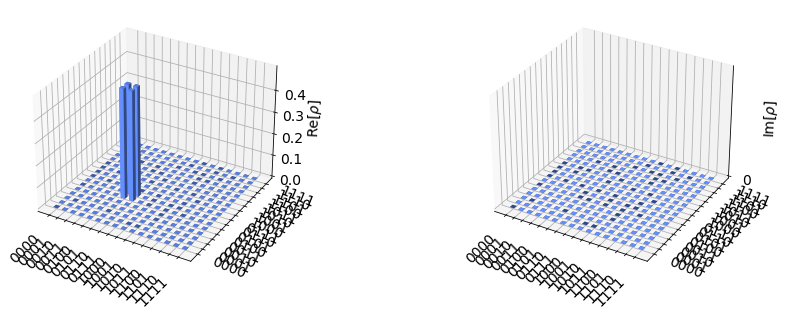

In [25]:
plot_state_city(outputstate)